In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt

In [2]:
## set working directory
os.chdir("/data1/niehu/ibd_public_data_20210821/analysis_20220111/02.integrate/B_plasma/")

In [3]:
## read data
adata = sc.read_h5ad("./B_plasma.bySample.n10.bbknn_umap_leiden_marker.res1.2.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)

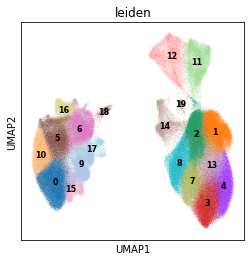

In [4]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='leiden', frameon=True, legend_fontsize = 8)

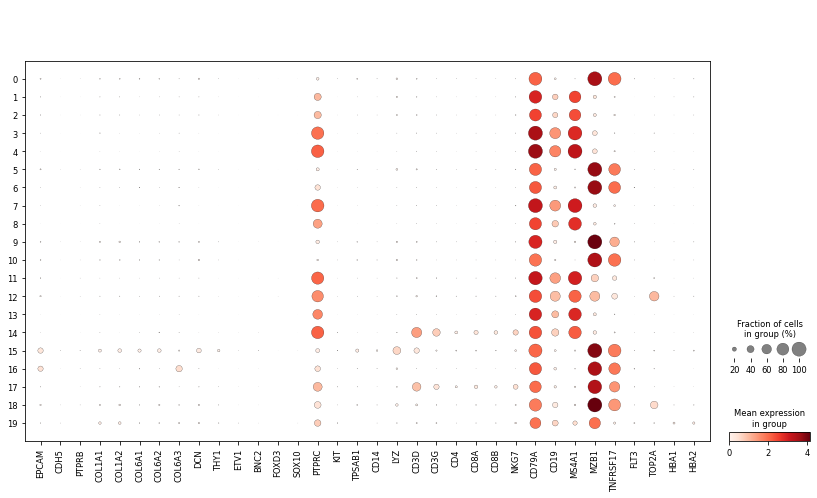

In [5]:
major_markers = ["EPCAM", # epithelial
                 "CDH5","PTPRB",  # endothelial
                 "COL1A1","COL1A2","COL6A1","COL6A2","COL6A3","DCN","THY1", ## Mesenchymal
                 "ETV1","BNC2","FOXD3","SOX10",  # neuronal
                 "PTPRC", # immune cells
                 "KIT","TPSAB1", # mast cells
                 "CD14","LYZ", # myeloid
                 "CD3D","CD3G","CD4","CD8A","CD8B","NKG7", # T/NK cells
                 "CD79A","CD19","MS4A1","MZB1","TNFRSF17", # B/plasmal cells
                 "FLT3", "TOP2A",
                 "HBA1","HBA2",
                 ]
sc.pl.dotplot(adata, major_markers, groupby='leiden');

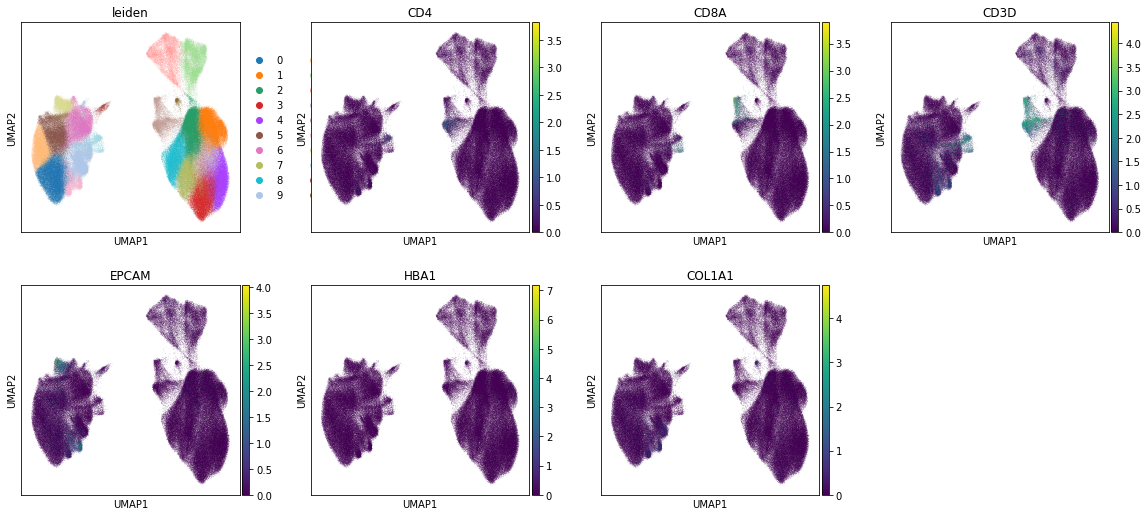

In [6]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=['leiden',"CD4","CD8A","CD3D","EPCAM","HBA1","COL1A1"])

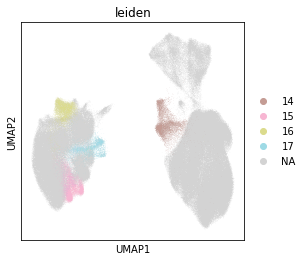

In [7]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', groups=['14','15','16','17'])

In [8]:
select = np.logical_not(adata.obs.leiden.isin(['14','15','16','17']))
adata = adata[ select ]

In [9]:
cells = adata.obs.index.to_list()

In [10]:
tmp = sc.read_h5ad("../ibd_20220111.raw.h5ad")
adata = tmp[tmp.obs.index.isin(cells)]

In [11]:
CD3D = adata[:,"CD3D"].X.toarray()
CD3G = adata[:,"CD3G"].X.toarray()

EPCAM = adata[:,"EPCAM"].X.toarray()
COL1A1 = adata[:,"COL1A1"].X.toarray()

HBA1 = adata[:,"HBA1"].X.toarray()
HBA2 = adata[:,"HBA2"].X.toarray()
HBB = adata[:,"HBB"].X.toarray()

In [12]:
total = np.array(adata.X.sum(axis=1))
CD3D_exp = np.log2( CD3D*10000/total + 1)
CD3G_exp = np.log2( CD3G*10000/total + 1)
CD3_exp = (CD3D_exp+CD3G_exp)/2

EPCAM_exp = np.log2( EPCAM*10000/total + 1)
COL1A1_exp = np.log2( COL1A1*10000/total + 1)

HBA1_exp = np.log2( HBA1*10000/total + 1)
HBA2_exp = np.log2( HBA2*10000/total + 1)
HBB_exp = np.log2( HBB*10000/total + 1)
HB_exp = (HBA1_exp + HBA2_exp  + HBB_exp)/3

Text(0.5, 1.0, 'CD3_exp')

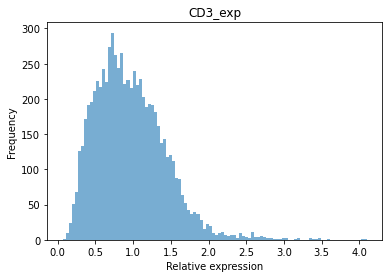

In [13]:
fig,ax=plt.subplots()
data = CD3_exp[CD3_exp > 0 ]
ax.hist(data,bins=100,histtype="stepfilled",alpha=0.6,label="CD3_exp")
plt.xlabel("Relative expression")
plt.ylabel("Frequency")
plt.title("CD3_exp")

Text(0.5, 1.0, 'EPCAM_exp')

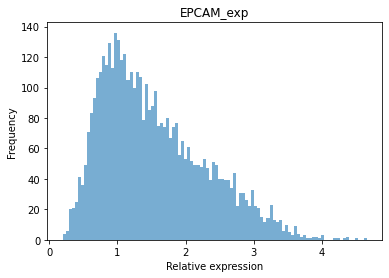

In [14]:
fig,ax=plt.subplots()
data = EPCAM_exp[EPCAM_exp > 0 ]
ax.hist(data,bins=100,histtype="stepfilled",alpha=0.6,label="EPCAM_exp")
plt.xlabel("Relative expression")
plt.ylabel("Frequency")
plt.title("EPCAM_exp")

Text(0.5, 1.0, 'COL1A1_exp')

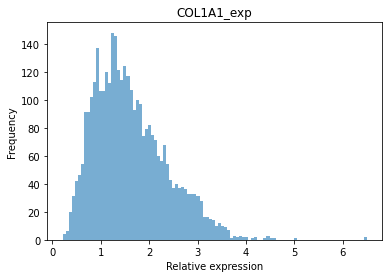

In [15]:
fig,ax=plt.subplots()
data = COL1A1_exp[COL1A1_exp > 0 ]
ax.hist(data,bins=100,histtype="stepfilled",alpha=0.6,label="COL1A1_exp")
plt.xlabel("Relative expression")
plt.ylabel("Frequency")
plt.title("COL1A1_exp")

Text(0.5, 1.0, 'HB_exp')

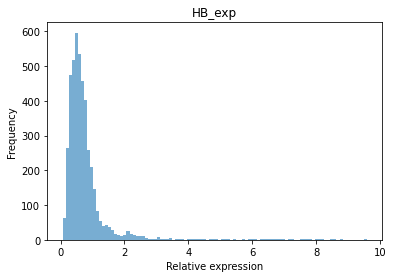

In [16]:
fig,ax=plt.subplots()
data = HB_exp[HB_exp > 0 ]
ax.hist(data,bins=100,histtype="stepfilled",alpha=0.6,label="HB_exp")
plt.xlabel("Relative expression")
plt.ylabel("Frequency")
plt.title("HB_exp")

In [17]:
select =  np.logical_or(CD3_exp > 0.1, EPCAM_exp > 0.1)
select =  np.logical_or(select, COL1A1_exp > 0.1)
select =  np.logical_or(select, HB_exp > 0.1)
select =  np.logical_not(select)
print(np.sum(select)/len(select))

0.9335058279742765


In [18]:
adata = adata[select]

In [19]:
adata.write_h5ad("B_plasma.bySample.n10.filtered.h5ad")

In [20]:
## done